# Simulating soccer matches

In this notebook, you will near to simulate soccer matches using the Poisson distribution. This is a very simple, model but shows how simple generative models can simulate real word situations.

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Model

Here is the basic model we are going to work with:

* There are two teams (1 and 2) that are going to meet in the finals of the world cup.
* All we know about those teams is the average number of goals that have scored in each past game.
* You are going to model the number of goals they score per game using a Poisson distribution.
* By drawing samples from the appropriate Poisson distribution for each team, you will simulate the point spread.
* Using the point spread, you will calculate the probability of each team winning or a tie.

Here are the parameters of the model:

In [46]:
t1_avg = 3 # team 1 average goals per game
t2_avg = 2 # team 2 average goals per game
n = 500    # number of simulated games

Simulate `n` games for each team using a Poisson distribution $Pois(\lambda)$ with $\lambda$ chosen appropriately for the team. Store the number of goals for each team in a NumPy array named `sim1` and `sim2`:

In [47]:
sim1 = np.random.poisson(t1_avg, n)
sim2 = np.random.poisson(t2_avg, n)

In [48]:
assert len(sim1)==n
assert len(sim2)==n
assert sim1.dtype==np.dtype(int)
assert sim2.dtype==np.dtype(int)
assert abs(sim1.mean()-t1_avg)<0.1
assert abs(sim2.mean()-t2_avg)<0.1

Calculate an array of point spreads ($Team_2-Team_1$) for the `n` games. Save your array as the variable `spread`.

In [49]:
spread = [sim2 - sim1 for sim1,sim2 in zip(sim1,sim2)]
spread = np.array(spread)

In [50]:
print (len(spread))

500


In [51]:
print (spread)

[-5 -4  0 -1 -1 -2  3 -2 -1 -3 -1 -4 -7  1  0 -1  0  0 -6  0 -3  1 -5 -3 -4
 -1 -3 -2  0 -1 -4 -5 -2 -1 -1 -3 -2 -3 -5 -4  1 -1 -3 -2  3 -1  2 -3 -4 -1
  0  1 -1 -2  1 -3 -3 -1 -1 -1  0  1 -5  1  0 -5  0 -3  1 -1 -1  1  1  0 -4
 -1 -4  3  0 -1 -3  5 -4 -5 -4  0 -2  0 -2 -1  1 -4 -1 -2  2 -3 -2 -1 -1  4
  1 -1 -2  2  1 -3 -4 -1  2 -6  1 -4 -2  4  0 -4  2 -5 -4  0 -4 -5 -2 -4  0
 -1 -4 -3 -2 -1 -2 -3 -2  1  2 -1 -3 -1  1  2 -2 -3 -3  0 -5  1 -3 -1 -2 -2
 -1  1 -3 -7 -2 -2  0  1 -1 -2 -3  0  0 -1  0  4 -3  0 -1 -3 -1  0  4 -3 -5
  0 -1 -1  1 -2  0 -2 -2  3 -2  0 -2 -5 -3 -1  1 -2  1  0 -2 -1  1 -2 -1  4
 -2 -3 -4 -1  0 -6 -3 -2  2  0  6 -1 -2  3 -1 -2 -3  0 -1 -2  0  0  1 -2  3
 -1 -4 -1  0 -1 -1 -2  2 -1 -4 -1  1  2  0 -1  1 -2  1  0  3  0 -1  1 -3  0
 -1 -1  0 -1 -3  0  1  2  3  1 -1  2 -1  3 -1  0  0 -2 -4 -1 -2 -3 -2 -2 -4
 -4  1  7  1  1 -6 -3 -2 -1  0 -3 -1 -1  0 -6 -1  1 -2 -4  1 -2  0  2 -1 -3
 -2 -7  1 -2 -2  1  1 -2  1 -6  0 -1 -2  0 -5  1 -2  0 -2  1 -4 -2 -3 -2 -3
  1 -1 -2  0

In [52]:
assert len(spread)==n
assert spread.dtype==np.dtype(int)

Visualize the point spread by making a `distplot` using Seaborn. Label your axes.

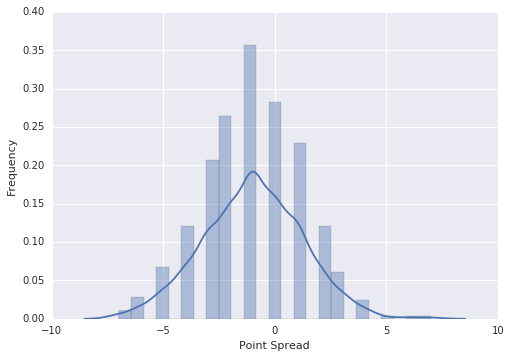

In [53]:
sns.distplot(spread)
plt.xlabel("Point Spread")
plt.ylabel("Frequency")

Use the array of simulated point spreads to calculate the probabilities that each team will win or reach a tie. Print these probabilities, along with the team numbers.

In [59]:
# Talked with Liz Rosa about using numpy to turn array to bools and sum


t2_win_prob = ((spread < 0).sum())/n #True is team one wins
t1_win_prob = 1 - t2_win_prob
print ("T2 WIN: ", t2_win_prob)
print ("T1 WIN: ", t1_win_prob)




T2 WIN:  0.592
T1 WIN:  0.408
